In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vgg19 = tf.keras.applications.VGG19()
vgg19.summary()

574726144/574710816 [==============================] - 547s 1us/step


In [3]:
vgg19 = tf.keras.applications.VGG19(weights='imagenet')

In [23]:
# %%capture
# %pip install wget
!python -m wget https://i.pinimg.com/564x/6c/a5/9d/6ca59d4aa621af254c57f9b2ee9293d5.jpg -o panda.jpg
!python -m wget https://i.pinimg.com/736x/9e/c9/4f/9ec94f956df6af4b4cc6b83acd11c2d8.jpg -o car.jpg
!python -m wget https://i.pinimg.com/564x/0f/8b/a5/0f8ba5b8d78ed7c43ababd190aafb282.jpg -o house.jpg


Saved under panda.jpg

Saved under car.jpg

Saved under house.jpg


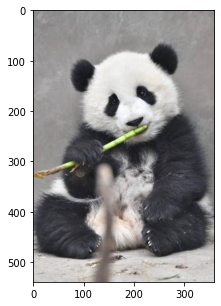

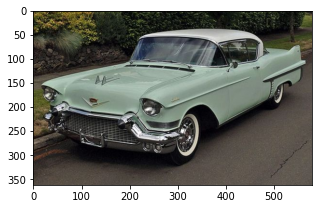

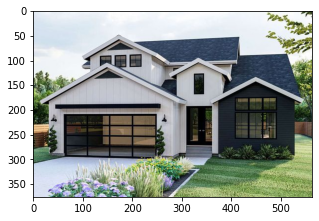

In [24]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
car = read_and_show("car.jpg")
house = read_and_show("house.jpg")

In [25]:
def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]

prepare_image(panda, (224, 224)).numpy().shape

(1, 224, 224, 3)

In [26]:
input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)

In [27]:
prediction

array([[6.27901553e-09, 2.51034429e-08, 1.14329043e-06, 8.07868972e-08,
        5.55488953e-07, 6.32531794e-07, 3.62563651e-06, 9.85717463e-08,
        1.96915585e-06, 2.16545391e-06, 2.29326020e-06, 1.54555128e-05,
        4.70532484e-08, 2.49134564e-06, 1.55006148e-06, 4.42457448e-08,
        5.62131731e-07, 2.69110868e-04, 5.44995273e-05, 6.66893829e-05,
        1.51885763e-06, 1.11504266e-06, 1.71026613e-06, 3.37993043e-07,
        4.54070886e-07, 9.24345557e-07, 1.18274251e-07, 4.71091255e-07,
        6.47799311e-07, 4.97614465e-08, 2.97560003e-08, 6.49321805e-08,
        1.27872156e-07, 3.67002741e-07, 1.54839211e-06, 3.23447438e-08,
        3.46746617e-07, 5.03153963e-09, 1.67637415e-06, 7.48283284e-08,
        2.04818093e-07, 5.50118443e-07, 3.24688727e-07, 3.44897400e-09,
        2.45984175e-08, 2.48218430e-06, 4.49812177e-07, 2.94055869e-09,
        8.08231135e-08, 1.02103117e-08, 2.69750906e-08, 1.47974628e-08,
        2.46450156e-07, 6.44044860e-07, 7.77366935e-08, 9.797670

In [34]:
def show_catsdogs(images, labels, predicted_labels=None, row=False, title=""):
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(title, fontsize="x-large")
    n = len(images)
    for i in range(n):
        plt.imshow(images[i])
        title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
        plt.setp(title_obj, color='r')

In [28]:
prediction.sum(), prediction.shape 

(1.0000002, (1, 1000))

In [29]:
from tensorflow.keras.applications.vgg19 import decode_predictions

decode_predictions(prediction)

49152/35363 [=========================================] - 0s 2us/step


[[('n02134084', 'ice_bear', 0.19244754),
  ('n02120079', 'Arctic_fox', 0.1881441),
  ('n04399382', 'teddy', 0.12656358),
  ('n02510455', 'giant_panda', 0.10645268),
  ('n02111889', 'Samoyed', 0.096982956)]]

In [30]:
from tensorflow.keras.applications.vgg19 import preprocess_input
input_image = prepare_image(house, (224, 224))
input_image = preprocess_input(input_image)

prediction = vgg19.predict(input_image)
decode_predictions(prediction)

[[('n03930313', 'picket_fence', 0.3219349),
  ('n02859443', 'boathouse', 0.13906886),
  ('n03899768', 'patio', 0.10949764),
  ('n04589890', 'window_screen', 0.06937972),
  ('n03776460', 'mobile_home', 0.053763945)]]

In [31]:
def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. Min: {input_image.numpy().min()}.")

    prediction = model.predict(input_image)
    return decode_predictions(prediction)

In [32]:
make_prediction(vgg19, preprocess_input, decode_predictions, house)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.


[[('n03930313', 'picket_fence', 0.3219349),
  ('n02859443', 'boathouse', 0.13906886),
  ('n03899768', 'patio', 0.10949764),
  ('n04589890', 'window_screen', 0.06937972),
  ('n03776460', 'mobile_home', 0.053763945)]]